# Markov Chains

The Flumphs from planet Seyst live in one of three states:
* Hungry
* Content
* Aggravated 

Based on the state of a Flumph on one day, you can predict the state on the day after. This could be represented as a 
table or matrix: <br>
### Initial chance-matrix and chance-vector
$H\leftarrow \mathbf{Hungry},\space C \leftarrow \mathbf{Content},\space A \leftarrow \mathbf{Aggravated}, \space
T \leftarrow \mathbf{Tomorrow},\space D \leftarrow \mathbf{Today}$ <br>

$\begin{array} {|c|c|c|c|} 
\hline D/T   & T_{H} & T_{C} & T_{A} \\
\hline D_{H} & 80\% &  10\% & 10\% \\
\hline D_{C} & 40\% & 50\% & 10\% \\
\hline D_{A} & 60\% & 20\% & 20\% \\ \hline
\end{array} $ <br> <br>

$M_{C} = \begin{bmatrix}0.80 & 0.40 &0.60 \\ 0.10 & 0.50 & 0.20\\ 0.10&0.10&0.20 \end{bmatrix}$ <br>

We also know that when a Flumph is born, it has a 10% chance to be hungry, a 70% chance to be content and a 20% chance 
to be aggravated. This can be turned into a vector. <br>
$\vec{c} = \begin{bmatrix} 0.10 \\ 0.70 \\ 0.20 \end{bmatrix}$ <br>

To calculate the odds for the day after a Flumph is born, one simply has to calculate the matrix-vector product between
these two. 
### The chances on the day after birth
$\vec{y} = \begin{bmatrix}0.80 & 0.40 &0.60 \\ 0.10 & 0.50 & 0.10\\ 0.10&0.10&0.20 \end{bmatrix} \cdot 
\begin{bmatrix} 0.10 \\ 0.70 \\ 0.20 \end{bmatrix}$
>$=\begin{bmatrix} 0.08+0.28+0.12\\
0.01+0.35+0.04\\
0.01+0.07+0.04\\ \end{bmatrix}$  

$\vec{y} = \begin{bmatrix} 0.48\\0.4\\0.12 \end{bmatrix}$ <br>
This means, that on the day after a Flumph is born, there is a 48% chance that the Flumph is hungry, a 40% chance that
the Flumph is content and a 12% chance that the Flumph is aggravated. <br>
Below, you will see this solved by the script:

In [10]:
def matrix_vector_product(activation, weights):
    output_layer = list()
    for w in weights:
        vector = 0.0
        for a in range(len(activation)):
            vector1 = float(float(activation[a]) * float(w[a]))
            vector += vector1
        output_layer.append(vector)
    return output_layer

chance_matrix_1 = [
    [0.8, 0.4, 0.6],
    [0.1, 0.5, 0.2],
    [0.1, 0.1, 0.2]]
chance_vector_1 = [0.10, 0.70, 0.20]

print("y =",matrix_vector_product(chance_vector_1, chance_matrix_1))

y = [0.48, 0.4, 0.12]


### Adding a 4th condition
A Flumph can also be upside-down! (https://en.wikipedia.org/wiki/Flumph). When a Flumph is upside-down on one day, the
chances of it being aggravated the next day are 30%, the chances of it being hungry is 30%, the chances of it being
content 10% and chances of it being upside-down are 30%. <br><br>
Due to adding a 4th condition, the chances in from the other conditions must also be altered. All of this results in the
following matrix:

$M_{C} = \begin{bmatrix} 
0.70 & 0.30 & 0.50 & 0.30 \\
0.10 & 0.60 & 0.10 & 0.30 \\
0.10 & 0.10 & 0.20 & 0.10 \\
0.10 & 0.10 & 0.20 & 0.30
 \end{bmatrix}$ <br><br>
Due to their floaty nature, it is likely that a Flumph is born upside-down. Because of this, the following chance-vector
is accurate at birth: <br>
$\vec{c} = \begin{bmatrix} 0.10\\0.50\\0.10\\0.30 \end{bmatrix}$ <br>
Assuming the same matrix-vector multiplication as before, the following chance-vector is accurate for the day after the 
Flumph is born, this time only using the function as defined above: 
### The chances on the day after birth

In [52]:
names1 = ["Hungry", "Content", "Aggravated"]
names2 = names1.copy()
names2.append("Upside-Down")
chance_matrix_2 = [
    [0.7, 0.3, 0.5, 0.3],
    [0.1, 0.5, 0.1, 0.3],
    [0.1, 0.1, 0.2, 0.1],
    [0.1, 0.1, 0.2, 0.3]]

chance_vector_2 = [0.1, 0.5, 0.1, 0.3]

print("y =",matrix_vector_product(chance_vector_2, chance_matrix_2))

y = [0.36, 0.36, 0.11000000000000001, 0.17]


$\vec{y} = \begin{bmatrix} 0.36\\0.36\\0.11\\0.17 \end{bmatrix}$

### Estimating the likeliest condition in the future
For both chance-matrices the nth chance-vector will be calculated through matrix-matrix multiplication.


In [36]:
import numpy as np
def matrix_matrix_product(matrix1, matrix2):
    matrix_product = list()
    for column in np.transpose(matrix2):
        matrix_product.append(matrix_vector_product(column, matrix1))
    matrix_product = np.array(matrix_product)
    return np.transpose(matrix_product)

In [3]:
n = 99

In [54]:

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize'] = [10,5]
style.use('ggplot')
def get_nth(matrix, vector, **kwargs):
    matrix_c = matrix.copy()
    plots = [[] for index in range(len(vector))]

    
    # n = global
    for i in range(n):
        matrix_c = matrix_matrix_product(matrix_c, matrix)
        temp_vector = matrix_vector_product(vector, matrix_c)
        for x in range(len(temp_vector)):
            lst = plots[x]
            lst.append(temp_vector[x])
    y = matrix_vector_product(vector, matrix_c)
    for chance_plot in range(len(plots)):
        if kwargs.get("names"):
            plt.plot(plots[chance_plot], label=kwargs.get("names")[chance_plot])
        else:
            plt.plot(plots[chance_plot])
    plt.xlabel("{} days, with 0 being day of birth".format(n+1))
    plt.ylabel("Percentages shown in decimals")
    plt.legend()    
    plt.show()
    return y

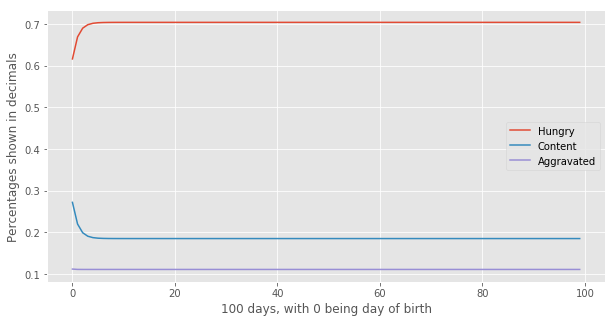

For chance-matrix 3-conditions 100 days 
	y = [0.7037037037037046, 0.1851851851851853, 0.11111111111111127]

For chance-matrix 4-conditions 100 days 
	y = [0.537037037037037, 0.21296296296296308, 0.11111111111111113, 0.1388888888888889]


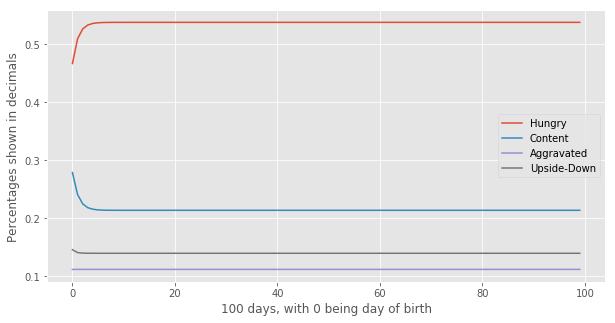

In [55]:
print("For chance-matrix 3-conditions {} days \n\ty =".format(n+1),get_nth(chance_matrix_1, chance_vector_1, names=names1))
print()
print("For chance-matrix 4-conditions {} days \n\ty =".format(n+1),get_nth(chance_matrix_2, chance_vector_2, names=names2))

After 100 days, the chance-vectors stabilize to the following vectors:<br>
For 3 conditions: $\vec{y} = \begin{bmatrix}0.7\\0.19\\0.11 \end{bmatrix}$ <br><br>
For 4 conditions: $\vec{y} = \begin{bmatrix}0.54\\0.21\\0.11\\0.14 \end{bmatrix}$ <br>

From this, we can extrapolate that the likeliest condition for a Flumph by a large margin in both scenarios is hungry, 
followed up by content. Another thing to note is that somewhere before the n = 10 mark, all lines stagnate into linear 
horizontal lines. This means that the chance vector is constant from that point onwards.


## Getting the nth state through Eigenbasis
Calculating the nth state through Python is easy. It is simply taking the dot product of a matrix with itself n (or n-1 
in this script) amount of times. On paper, however, this is a far more tedious process.  

To expedite this process, one can transform the matrix into a diagonal matrix. Thus, getting the nth state from an 
$O(N^{2})$ to an $O(N)$ operation. 
### Eigenvalues
The first step to calculating the nth state, is calculating a matrix' eigenvalues. This is done using the determinant 
and an unknown Lambda($\lambda$). The values of $\lambda$ are the eigenvalues.   <br><br>
You take the formula for the determinant, and alter it by subtracting $\lambda$ from the diagonal and setting the 
determinant to zero. <br><br>
#### Determinant
$ \det \left( \begin{matrix}x_{1} -\lambda & y_{1} & z_{1} \\ x_{2} & y_{2} -\lambda & z_{2}\\ 
x_{3} & y_{3} & z_{3} -\lambda \end{matrix} \right) = 0$<br><br>
Or in the case of the first scenario:<br><br>
$ \det \left( \begin{matrix}0.80 -\lambda & 0.40 & 0.60 
\\ 0.10 & 0.50 -\lambda & 0.20\\ 0.10 & 0.10 & 0.20 -\lambda \end{matrix} \right) = 0$
#### Characteristic equation
Using the rule of Sarrus (https://en.wikipedia.org/wiki/Rule_of_Sarrus) you can determine the characteristic equation of 
a 3x3 matrix:  

$(x_{1} -\lambda)(y_{2}-\lambda)(z_{3}-\lambda)+(y_{1}z_{2}x_{3}) + (z_{1}x_{2}y_{3})- 
(z_{1}(y_{2}-\lambda)x_{3})-((x_{1}-\lambda)z_{2}y_{3}) - (y_{1}x_{2}(z_{3} - \lambda)) = 0$  
At this point, you can enter the variables into your formula:  
$0 = (0.80-\lambda)(0.50-\lambda)(0.20-\lambda)+(0.40\times0.20\times0.10)+(0.60\times0.10\times0.10) - 
(0.60 \times (0.50 - \lambda)\times 0.10)-((0.80-\lambda)\times0.20\times0.10)-
(0.40\times 0.10\times(0.20-\lambda)) $ <br>
This has been broken up into two separate parts for to make solving easier (the formula is simply too long for Jupyter). 
Everything left of the first minus sign 
outside parentheses is A, everything right is B.<br>


$A=(0.80-\lambda)(0.50-\lambda)(0.20-\lambda)+(0.40\times0.20\times0.10)+(0.60\times0.10\times0.10)$
>$=(0.80-\lambda)(0.50-\lambda)(0.20-\lambda) + 0.008‬ + 0.006‬$<br>
$=(0.80-\lambda)(0.50-\lambda)(0.20-\lambda)+ 0.014‬$  
$=(0.40 - 0.80\lambda - 0.50\lambda + \lambda^{2})(0.20 - \lambda) + 0.014$  
$=(0.40 - 1.3\lambda+ \lambda^{2})(0.20 - \lambda) + 0.014$  
$=0.08 - 0.40\lambda -0.26\lambda + 1.3\lambda^{2} + 0.20\lambda^{2} - \lambda^{3} + 0.014$  
$=0.094 -0.66\lambda + 1.50\lambda^{2} - \lambda^{3}$

$A = -\lambda^{3} + 1.50\lambda^{2} - 0.66\lambda + 0.094$ <br><br>

$B = -(0.60 \times (0.50 - \lambda)\times 0.10)-((0.80-\lambda)\times0.20\times0.10)-
(0.40\times 0.10\times(0.20-\lambda))$
>$=-0.10(0.30 - 0.60\lambda) - 0.10(0.16 - 0.20\lambda)-0.40(0.02 - 0.10\lambda)$  
$=-0.03 + 0.06\lambda - 0.016 + 0.02\lambda - 0.008‬ + 0.04\lambda$  

$B=0.12\lambda - 0.054‬$  

$0 = A + B$
>$= -\lambda^{3} + 1.50\lambda^{2} - 0.66\lambda + 0.094 + 0.12\lambda - 0.054‬$  
$= -\lambda^{3} + 1.50\lambda^{2} - 0.54\lambda + 0.04$

$0 = -\lambda^{3} + 1.50\lambda^{2} - 0.54\lambda + 0.04$  
$0 = (-\lambda + 1)(\lambda-0.4)(\lambda-0.1)$  

The three values for lambda where the determinant equals zero, are 1, 0.4 and 0.1. These values the eigenvalues to our 
previously defined matrix. 

### Eigenvectors (WIP)
While I know which formulas are involved in calculating the eigenvectors, their application still eludes me. The steps
taken below are simply the first steps in calculating the eigenvectors. Eigenvectors noted below are calculated through 
the Numpy 'eig' function.<br>
The next step is to calculate the eigenvectors. For each unique eigenvalue, there is an eigenvector. Calculating the 
eigenvector uses the following formula:  
$(A-\lambda\cdot I)\vec{v} = \vec{0}$  
In our case, there are three different versions of $A-\lambda\cdot I$, and thus, three possible eigenvectors: <br><br>
#### For $\lambda = 1$  
>$\begin{bmatrix}0.80 -1  & 0.40 & 0.60 
\\ 0.10 & 0.50 - 1 & 0.20\\ 0.10 & 0.10 & 0.20 - 1 \end{bmatrix}
 \begin{bmatrix} v_{1} \\ v_{2} \\ v_{3} \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}$<br><br>
 $\begin{bmatrix}-0.20 & 0.40 & 0.60 
\\ 0.10 & -0.50 & 0.20\\ 0.10 & 0.10 & -0.80\end{bmatrix}
 \begin{bmatrix} v_{1} \\ v_{2} \\ v_{3} \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}$<br>
 RREF:<br>
$\begin{bmatrix}1&0&0 \\ 0&1&0\\0&0&1 \end{bmatrix}
\begin{bmatrix} v_{1} \\ v_{2} \\ v_{3} \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}$<br><br>
$1v_{1} + 0v_{2} + 0v_{3} = 0$  
$0v_{1} + 1v_{2} + 0v_{3} = 0$  
$0v_{1} + 0v_{2} + 1v_{3} = 0$  

Eigenvector for $\lambda = 1: \begin{bmatrix} -0.96\\-0.25\\-0.15\\ \end{bmatrix}$<br>
#### For $\lambda = 0.4$
>$\begin{bmatrix}0.80 -0.40  & 0.40 & 0.60 
\\ 0.10 & 0.50 - 0.40 & 0.20\\ 0.10 & 0.10 & 0.20 - 0.40 \end{bmatrix}
 \begin{bmatrix} v_{1} \\ v_{2} \\ v_{3} \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}$<br><br>
$\begin{bmatrix}0.40& 0.40 & 0.60 
\\ 0.10 & 0.10 & 0.20\\ 0.10 & 0.10 & -0.20 \end{bmatrix}
 \begin{bmatrix} v_{1} \\ v_{2} \\ v_{3} \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}$<br>
 RREF:<br>
 $\begin{bmatrix}1& 1 & 0 
\\ 0 & 0 & 1\\ 0 & 0 & 0 \end{bmatrix}
 \begin{bmatrix} v_{1} \\ v_{2} \\ v_{3} \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}$<br><br>
$1v_{1} + 1v_{2} + 0v_{3} = 0$  
$0v_{1} + 0v_{2} + 1v_{3} = 0$  
$0v_{1} + 0v_{2} + 0v_{3} = 0$ <br>

Eigenvector for $\lambda = 0.4: \begin{bmatrix} -0.71\\0.71\\0.0 \end{bmatrix}$<br>
#### For $\lambda = 0.1$
>$\begin{bmatrix}0.80 -0.10  & 0.40 & 0.60 
\\ 0.10 & 0.50 - 0.10 & 0.20\\ 0.10 & 0.10 & 0.20 - 0.10 \end{bmatrix}
 \begin{bmatrix} v_{1} \\ v_{2} \\ v_{3} \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}$<br><br>
$\begin{bmatrix}0.70& 0.40 & 0.60 
\\ 0.10 & 0.40 & 0.20\\ 0.10 & 0.10 & 0.10 \end{bmatrix}
 \begin{bmatrix} v_{1} \\ v_{2} \\ v_{3} \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}$<br>
 RREF:<br>
 $\begin{bmatrix}1& 0 & \frac{2}{3} 
\\ 0 & 1 & \frac{1}{3}\\ 0 & 0 & 0 \end{bmatrix}
 \begin{bmatrix} v_{1} \\ v_{2} \\ v_{3} \end{bmatrix} = \begin{bmatrix} 0\\0\\0 \end{bmatrix}$<br><br>
$1v_{1} + 0v_{2} + \frac{2}{3}v_{3} = 0$  
$0v_{1} + 1v_{2} + \frac{1}{3}v_{3} = 0$  
$0v_{1} + 0v_{2} + 0v_{3} = 0$ <br>

Eigenvector for $\lambda = 0.1: \begin{bmatrix} -0.53\\-0.27\\0.8 \end{bmatrix}$<br>
 
### Eigenbasis
The eigenvectors from earlier can then be arranged into a new matrix called the Eigenbasis: <br>
$P = \begin{bmatrix}
-0.96&-0.71&-0.53\\
-0.25&0.71&-0.27\\
-0.15&0.0&0.8\\ \end{bmatrix}$ <br>
The inverse of the eigenbasis must also be calculated: <br>
$P^{-1}=\begin{bmatrix}
 -0.74&-0.74&-0.74\\
-0.31&1.1&0.16\\
-0.14&-0.14&1.11\\
\end{bmatrix}$

### Putting together the final pieces of the puzzle (WIP)
Using the eigenvalues, the eigenbasis and the inverted eigenbasis it is possible to reconstruct the original matrix:  
$A = P\cdot E\cdot P^{-1}$<br>
But what is the E? The E is a diagonal matrix based on the Eigenvalues from earlier!   
$E = \begin{bmatrix} 1.0&0.0&0.0\\
0.0&0.4&0.0\\
0.0&0.0&0.1\\ \end{bmatrix}$  

$A = \begin{bmatrix}
-0.96&-0.71&-0.53\\
-0.25&0.71&-0.27\\
-0.15&0.0&0.8\\ \end{bmatrix} \cdot 
\begin{bmatrix} 1.0&0.0&0.0\\
0.0&0.4&0.0\\
0.0&0.0&0.1\\ \end{bmatrix} \cdot
\begin{bmatrix}
 -0.74&-0.74&-0.74\\
-0.31&1.1&0.16\\
-0.14&-0.14&1.11\\
\end{bmatrix} = 
\begin{bmatrix} 0.8&0.4&0.6\\
0.1&0.5&0.2\\
0.1&0.1&0.2\\ \end{bmatrix}$ <br><br>
#### Calculating the nth power of a matrix
Calculating the nth power of a matrix requires a slight alteration to the formula we used above:
$A^{n} = P\cdot E^{n}\cdot P^{-1}$<br>
You see, when a matrix has been diagonalised as we have here, you can simply take the nth power of the diagonal matrix
and input that into the $A = P\cdot E\cdot P^{-1}$ formula.<br>
Calculating the nth power of a diagonal matrix is simple:<br>
$M^{n} = \begin{bmatrix} a^{n} & 0 & 0\\ 0 & b^{n} & 0 \\ 0 & 0 & c^{n} \end{bmatrix}$<br>
Or in case of our $E$:<br>
$E^{n} = \begin{bmatrix} 1.0^{n}&0.0&0.0\\
0.0&0.4^{n}&0.0\\
0.0&0.0&0.1^{n}\\ \end{bmatrix}$ <br>
For this assignment, n = 100:<br>
$E^{100} = \begin{bmatrix} 1.0^{100}&0.0&0.0\\
0.0&0.4^{100}&0.0\\
0.0&0.0&0.1^{100}\\ \end{bmatrix} = \begin{bmatrix} 1.0&0.0&0.0\\
0.0&1.6\cdot10^{-40}&0.0\\
0.0&0.0&1 \cdot 10^{-100}\\ \end{bmatrix}$<br>

Input this into $A^{100} = P\cdot E^{100}\cdot P^{-1}$:<br>
$A^{100} = \begin{bmatrix}
-0.96&-0.71&-0.53\\
-0.25&0.71&-0.27\\
-0.15&0.0&0.8\\ \end{bmatrix} \cdot 
\begin{bmatrix} 1.0&0.0&0.0\\
0.0&1.6\cdot10^{-40}&0.0\\
0.0&0.0&1 \cdot 10^{-100}\\ \end{bmatrix} \cdot
\begin{bmatrix}
 -0.74&-0.74&-0.74\\
-0.31&1.1&0.16\\
-0.14&-0.14&1.11\\
\end{bmatrix} = 
\begin{bmatrix} 
\frac{19}{27}&\frac{19}{27}&\frac{19}{27}\\
\frac{5}{27}&\frac{5}{27}&\frac{5}{27}\\
\frac{1}{9}&\frac{1}{9}&\frac{1}{9}\\ \end{bmatrix}$

### The nth state of the Flumph's chance vector
The final step, is to calculate the matrix-vector product between $A^{100}$ and $\vec{c}$:<br>
*Note that this isn't actually necessary, the chance-matrix has plateaued so the outcome of this calculation will simply
 be a column from the matrix.*<br>
$\vec{y} = A^{100} \cdot \vec{c}$<br>
$\vec{c} = \begin{bmatrix} 0.10\\0.50\\0.10\\0.30 \end{bmatrix}$<br>
$\vec{y} = \begin{bmatrix} 
\frac{19}{27}&\frac{19}{27}&\frac{19}{27}\\
\frac{5}{27}&\frac{5}{27}&\frac{5}{27}\\
\frac{1}{9}&\frac{1}{9}&\frac{1}{9}\\ \end{bmatrix} \cdot \begin{bmatrix} 0.10\\0.50\\0.10\\0.30 \end{bmatrix}$<br>
$\vec{y} = \begin{bmatrix} \frac{19}{27} \\ \frac{5}{27} \\ \frac{1}{9} \end{bmatrix} \approx 
\begin{bmatrix} 0.70\\0.19\\0.11 \end{bmatrix}$<br>
The answer is exactly as expected from 
[Estimating the likeliest condition in the future](#Estimating-the-likeliest-condition-in-the-future). <br>
Below is the Python function that follows the same steps as the calculation above.

In [10]:
def get_nth_eigen(matrix, vector):
    # Get eigenvalues and eigenvectors
    values, vectors = np.linalg.eig(matrix)
    # Make a diagonal matrix from the the Eigenvalues
    diagonal_matrix = np.diag(values)

    # Invert the eigenvectors
    inverted_vectors = np.linalg.inv(vectors)

    # diagonal matrix to the power of n + 1
    power_n_matrix = np.power(diagonal_matrix, n + 1)

    # Reconstruct matrix A to the power of n + 1
    reconstructed_matrix = vectors.dot(power_n_matrix).dot(inverted_vectors)

    # Calculate output vector
    output_vector = matrix_vector_product(vector, reconstructed_matrix)

    return output_vector, reconstructed_matrix


In [15]:
vector_eig, matrix_eig = get_nth_eigen(chance_matrix_1, chance_vector_1)
print("The Matrix A^{}:".format(n + 1))
for row in matrix_eig:
    print("\t", row)
print()
print("The resulting vector y:")
for value in vector_eig:
    print("\t|",value,"|")


The Matrix A^100:
	 [0.7037037 0.7037037 0.7037037]
	 [0.18518519 0.18518519 0.18518519]
	 [0.11111111 0.11111111 0.11111111]

The resulting vector y:
	| 0.7037037037037351 |
	| 0.1851851851851936 |
	| 0.11111111111111606 |
